# Predicting the Onset of Diabetes Mellitus (Suppot Vector Machines)

In this project we will predict the onset of diabetes mellitus using variation of _Support Vector Machine Classifiers_. The data have been obtained from https://www.openml.org/d/37. It has a total of 8 features (excluding class) and 768 data points. Since the data is mostly in numeric form, there is not much of cleaning and encoding involved. Most of this project is focused on SVM Classifiers.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
#Load Data
df = pd.read_csv("dataset_37_diabetes.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


Following is a description of all the columns:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

Only the target column is in ```string``` form so we will map the positive(s) and negative(s) to 1s and 0s, respectively.

In [3]:
df["class"] = df["class"].map({"tested_positive": 1, "tested_negative": 0})
df = df.astype("float64")

In [4]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Understanding any correlation between features

In [5]:
corr = df.corr()

col = "class"

corr[col].sort_values(ascending=False)

class    1.000000
plas     0.466581
mass     0.292695
age      0.238356
preg     0.221898
pedi     0.173844
insu     0.130548
skin     0.074752
pres     0.065068
Name: class, dtype: float64

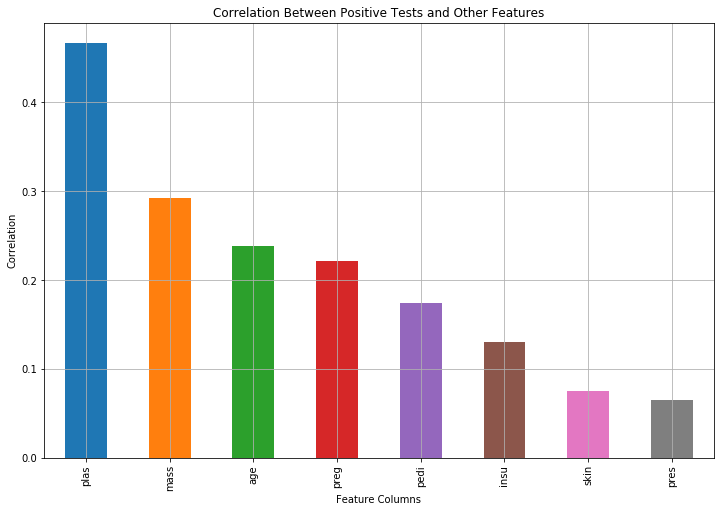

In [6]:
plt.figure(figsize=(12,8))
corr[col].sort_values(ascending=False).drop([col]).plot.bar()
plt.grid()
plt.xlabel("Feature Columns")
plt.ylabel("Correlation")
plt.title("Correlation Between Positive Tests and Other Features")
plt.show()

This plot of correlations is exactly as expected. Following are some observations:
- plas: A high level of glucosse present in blood during an oral glucose tolerance test strongly suggests the occurence of diabetese, thus a strong positive correlation.
- mass: More ovverweight (high BMI) people tend to be diabetic than underweight people, therefore a strong positive correlation is expected.
- age: Younger age group rarely shows any symptoms of diabetes. Majority diagnosis of diabees happens between age 45-64.

Similarly, other feature columns show positive correlation with positive tests but the aforementioned 3 are most prevalant.

### Implementing Machine Learning

In [7]:
X = df.drop(["class"], axis=1)
y = df["class"] #target

In [8]:
#split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=168./768., random_state=1)
#^This gives me 600 data points to train withand 168 to test with

#### Linear SVM with PolynomialFeatures

In [9]:
linear_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=5)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=0.001, loss="hinge", random_state=1))
])

In [10]:
linear_svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=1, tol=0.0001, verbose=0))])

In [11]:
y_pred_lin = linear_svm_clf.predict(X_test)

In [12]:
acc = accuracy_score(y_test, y_pred_lin)
prec = precision_score(y_test, y_pred_lin)
rec = recall_score(y_test, y_pred_lin)

In [13]:
print("Accuracy = "+"{0:.2f}".format(acc*100)+" %")
print("Precision = "+"{0:.2f}".format(prec*100)+" %")
print("Recall = "+"{0:.2f}".format(rec*100)+" %")

Accuracy = 80.36 %
Precision = 77.36 %
Recall = 66.13 %


The linear SVM classifier has an accuracy of 80.36%, precision of 77.36% and a recall of 66.13%. To understand what these scores mean, it'll be helpful to understand what they are:
- Accuracy: It is simply a ratio of correctly predicted observation to the total observations.
- Precision: It is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all the cases that were predicted as positive, how many actually have diabetes? High precision relates to the low false positive rate.
- Recall: It is the ratio of correctly predicted positive observations to the all observations in actual class. The question recall answers is - Of all the cases tested positive, how many did we predict as positive?

In case of a medical issue like diabetes, precision and recall are more important than accuracy.

#### SVM with Polnomial Kernel

In [14]:
svm_clf_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=4, probability=True, random_state=1))
])

In [15]:
svm_clf_poly.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=4, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=1,
  shrinking=True, tol=0.001, verbose=False))])

In [16]:
y_pred_poly = svm_clf_poly.predict(X_test)

In [17]:
acc = accuracy_score(y_test, y_pred_poly)
prec = precision_score(y_test, y_pred_poly)
rec = recall_score(y_test, y_pred_poly)

In [18]:
print("Accuracy = "+"{0:.2f}".format(acc*100)+" %")
print("Precision = "+"{0:.2f}".format(prec*100)+" %")
print("Recall = "+"{0:.2f}".format(rec*100)+" %")

Accuracy = 80.36 %
Precision = 80.85 %
Recall = 61.29 %


The linear SVM classifier has an accuracy of 80.36%, precision of 80.85% and a recall of 61.29%.

In [19]:
probs = pd.DataFrame(svm_clf_poly.predict_proba(X_test), columns=["negative", "positive"])

In [20]:
#Given the test data
print("Probability of testing a positive case = ",(y_test.loc[y_test == 1].values.shape[0])/(y_test.shape[0])*100)
print("Probability of prediciting a positive case = ",(y_pred_poly[y_pred_poly == 1].shape[0])/(y_pred_poly.shape[0])*100)

Probability of testing a positive case =  36.904761904761905
Probability of prediciting a positive case =  27.976190476190478


In [21]:
probs.describe()

,negative,positive
count,168.000000,168.000000
mean,0.639057,0.360943
std,0.226507,0.226507
min,0.003456,0.061447
25%,0.509910,0.182014
50%,0.711157,0.288843
75%,0.817986,0.490090
max,0.938553,0.996544


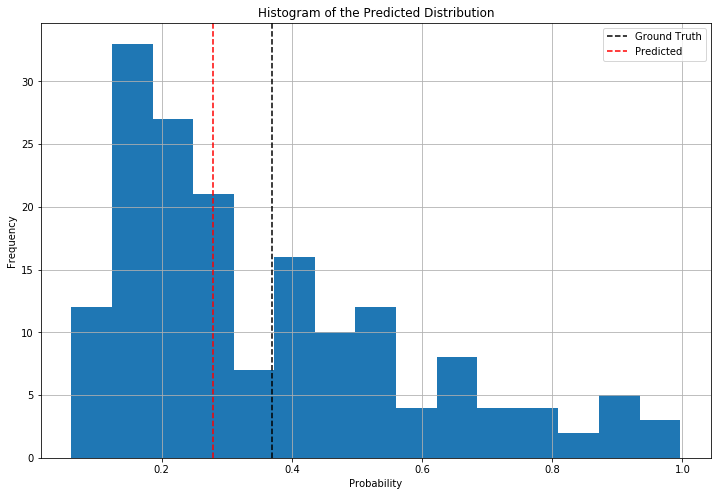

In [22]:
plt.figure(figsize=(12,8))
probs.positive.hist(bins=15)
plt.axvline(0.3690, color='k', linestyle='--', label="Ground Truth")
plt.axvline(0.2797, color='r', linestyle='--', label="Predicted")
plt.title("Histogram of the Predicted Distribution")
plt.legend()
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

#### SVM with Gaussian RBF Kernel

In [23]:
svm_clf_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=1, C=100, random_state=1))
])

In [24]:
svm_clf_rbf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [25]:
y_pred_rbf = svm_clf_rbf.predict(X_test)

In [26]:
acc = accuracy_score(y_test, y_pred_rbf)
prec = precision_score(y_test, y_pred_rbf)
rec = recall_score(y_test, y_pred_rbf)

In [27]:
print("Accuracy = "+"{0:.2f}".format(acc*100)+" %")
print("Precision = "+"{0:.2f}".format(prec*100)+" %")
print("Recall = "+"{0:.2f}".format(rec*100)+" %")

Accuracy = 67.26 %
Precision = 58.97 %
Recall = 37.10 %


This Gaussian RBF kernel based model performs the worst. A low precision score and an even lower recall score makes it useless.

## Summary

1. The linear SVM classifier (with ```PolynomialFeatures(degree=5)```) does a a pretty good job of predicting the onset of diabetes mellitus with an accuracy of 80.36%, precision of 77.36% and a recall of 66.13%.
2. The SVM classifier with a polynomial kernel achieves similar results with a slightly higher precision score of 80.85% but a slightly lower precision score of 61.29%.
3. THE SVM classifier with RBF kernel achieves the worst results and is basically useless for any task.

__Note:__ The highest accuracy and precision achieved by all the listed classifiers on openml.org are 78.78% and 78.09%. In contrast to these scores, both the first two classifiers do a pretty remarkable job.